<a href="https://colab.research.google.com/github/Leonel-H29/Metodos-Numericos-II/blob/master/TP3/Imagen_con_Filtro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

#from google.colab import drive
# Esto te va a solicitar autorizacion para acceder a tu Drive. 
# Entra al link y acepta los permisos. Copia la clave suministrada y pegalo donde te lo solicita
#drive.mount('/content/drive')

#%cd drive/My\ Drive/  #Elegir ubicacion
#%pwd #verifica la ubicacion

Analisis de las imagenes usando fft


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd14ff0ed50>,
 Text(0.5, 1.0, 'Imagen procesada'))

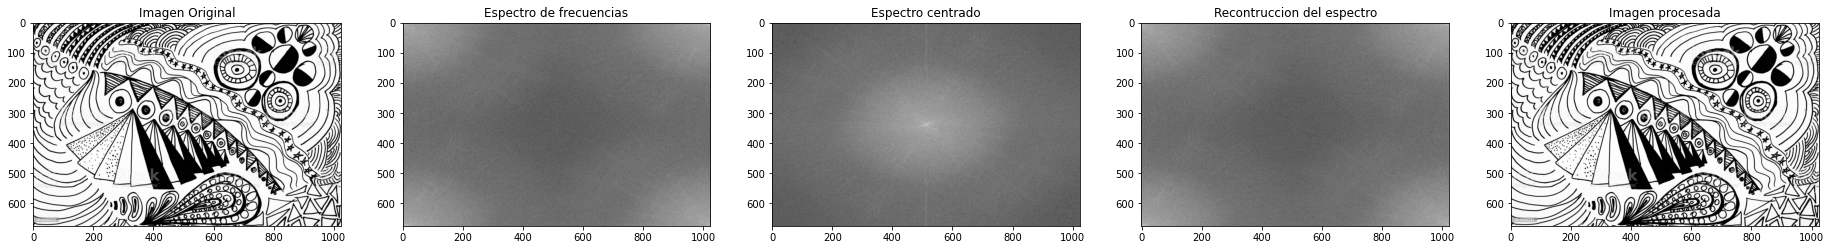

In [8]:
#Abrir la imagen
img_c1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/TP3/01.jpg", 0)

#Graficar el espectro de las frecuencias de img_c1, 
#¿Cual es la funcion adecuada para aplicar en una archivo de imagen?
img_c2 =  np.fft.fft2(img_c1)

#Centrar el espectro de las frecuencias
img_c3 = np.fft.fftshift(img_c2)

#Recontruya el espectro original de frecuencias
img_c4 = np.fft.ifftshift(img_c3)

#Recontruya la imagen a partir del espectro de frecuencias obtenido
img_c5 = np.fft.ifft2(img_c4)



#Graficas de los resultados obtenidos

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Imagen Original")

plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Espectro de frecuencias")

plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Espectro centrado")

plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Recontruccion del espectro")

plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Imagen procesada")







#Respuestas



*   a) El metodo CV2.imread lo que hace es cargar una imagen de un archivo especifico. Si no se puede leer esa imagen entonces el metodo devuelve una matriz vacia. 
*   Elemento de lista





Funciones para aplicar filtros en las imagenes


In [13]:
def distance(p1,p2):
    return sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

#Explique como funciona el filtro pasa-bajo
def FiltroPasaBajo(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base


#Implemente el filtro pasa-alto
def FiltroPasaAlto(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base
    #pass

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd14d689650>,
 Text(0.5, 1.0, 'Centered Spectrum multiply Low Pass Filter'))

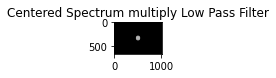

In [15]:
LowPassCenter = img_c3 * FiltroPasaBajo(50,img_c1 .shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")